In [1]:
import seaborn as sns
import json
import pandas as pd
import numpy as np


def load_data(file: str, label: str):
    maps = {}
    with open(file) as f:
        for line in f:
            if line.startswith("{"):
                x = json.loads(line)
                if x.get("type") == "map" and x.get("data", {}) is not None:
                    for k, v in x.get("data").items():
                        maps[k] = v
    entries = [(k, v) for k, v in maps["@instr_samples"].items()]
    entries.sort(key=lambda x: x[1])
    total_samples = sum(x[1] for x in entries)
    print(f"[{label}] Total samples:", total_samples)
    entries_w_index = [(float(i + 1) / len(entries), x[0], x[1]) for i, x in enumerate(entries)]
    entries_cumu = []
    s = 0
    for i, x in enumerate(entries_w_index):
        s += x[2]
        entries_cumu.append((x[0], x[1], x[2], s))  # (index, ipaddr, samples, samples.cumulative)
    entries_cumu_norm = [(x[0], x[1], x[2], x[3], x[2] / total_samples, x[3] / total_samples) for x in entries_cumu]
    df = pd.DataFrame(entries_cumu_norm, columns=["ip", "ip.addr", "samples", "samples.cumu", "samples.norm", "samples.cumu.norm"])
    # print(df)
    return df


def plot_one(**files: str):
    dfs = []
    for k, v in files.items():
        df = load_data(v, label=k)
        df["gc"] = k
        dfs.append(df)
    df = pd.concat(dfs)

    g = sns.lineplot(data=df, x="ip", y="samples.cumu.norm", hue="gc")

    if g.axes:
        g.axes.grid(True, axis="both")

    g.set_xticks(np.arange(0, 1.1, 0.1))
    g.set_yticks(np.arange(0, 1.1, 0.1))

    return df

[ix] Total samples: 821252
[lxr] Total samples: 319112
[g1] Total samples: 314099
[shen] Total samples: 923308
[z] Total samples: 2536005


,ip,ip.addr,samples,samples.cumu,samples.norm,samples.cumu.norm,gc
0,0.000244,0xffffffff9618c987,1,1,0.000001,0.000001,ix
1,0.000488,0x7858f2e2a556,1,2,0.000001,0.000002,ix
2,0.000732,0x7858f3212c53,1,3,0.000001,0.000004,ix
3,0.000977,0x7858f28f3610,1,4,0.000001,0.000005,ix
4,0.001221,0x7858f31d2968,1,5,0.000001,0.000006,ix
...,...,...,...,...,...,...,...
4091,0.999023,0x77a4aa937f22,50234,1150776,0.019808,0.453775,z
4092,0.999268,0x77a4aa93b9f4,63777,1214553,0.025149,0.478924,z
4093,0.999512,0x77a4aa93e1ee,95630,1310183,0.037709,0.516633,z
4094,0.999756,0x77a4aa00a990,320854,1631037,0.126519,0.643152,z


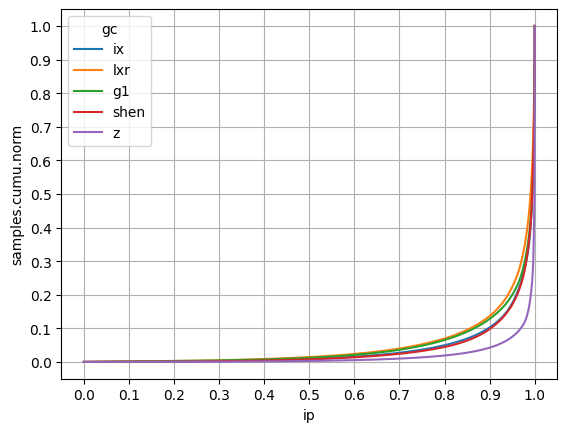

In [2]:
plot_one(
    ix="../../lusearch-ix.jsonl",
    lxr="../../lusearch-lxr.jsonl",
    g1="../../lusearch-g1.jsonl",
    shen="../../lusearch-shen.jsonl",
    z="../../lusearch-z.jsonl",
)

[exclude_gc] Total samples: 1038798


,ip,ip.addr,samples,samples.cumu,samples.norm,samples.cumu.norm,gc
0,0.000244,0x740644dfc11e,1,1,9.626511e-07,9.626511e-07,exclude_gc
1,0.000488,0xffffffff956df2a1,1,2,9.626511e-07,1.925302e-06,exclude_gc
2,0.000732,0x740665447d27,1,3,9.626511e-07,2.887953e-06,exclude_gc
3,0.000977,0x740665332905,1,4,9.626511e-07,3.850604e-06,exclude_gc
4,0.001221,0xffffffff961a19cd,1,5,9.626511e-07,4.813255e-06,exclude_gc
...,...,...,...,...,...,...,...
4091,0.999023,0xffffffff954178d4,44926,737542,4.324806e-02,7.099956e-01,exclude_gc
4092,0.999268,0xffffffff96245651,45361,782903,4.366681e-02,7.536624e-01,exclude_gc
4093,0.999512,0xffffffff953bbe77,75517,858420,7.269652e-02,8.263589e-01,exclude_gc
4094,0.999756,0xffffffff9543c783,77900,936320,7.499052e-02,9.013494e-01,exclude_gc


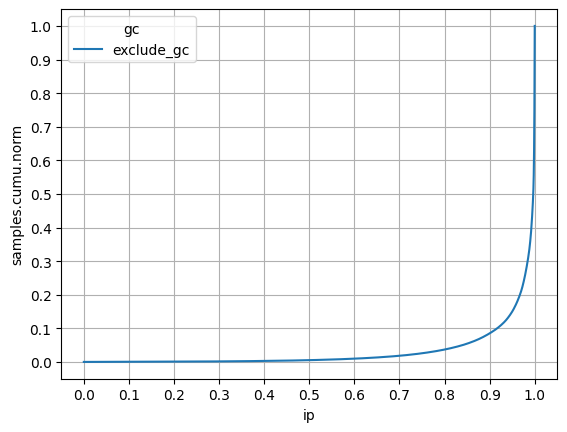

In [3]:
plot_one(
    exclude_gc="../../lusearch-other.jsonl",
)